In [5]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'deep'

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID, fig_id + '.png')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [6]:
# Vanishing exploding gradients
def logit(z):
    return 1 / (1 + np.exp(-z))

FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\deep\\sigmoid_saturation_plot.png'

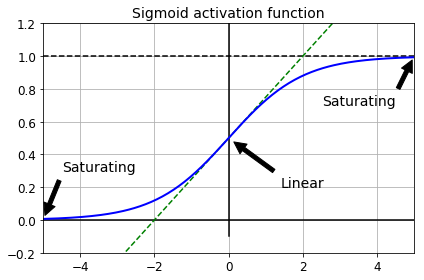

In [7]:
z = np.linspace(-5, 5, 200)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.1, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha='center')
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha='center')
plt.grid(True)
plt.title('Sigmoid activation function', fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig('sigmoid_saturation_plot')
plt.show()

In [8]:
import tensorflow as tf

In [9]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')

In [10]:
he_init = tf.contrib.layers.variance_scaling_initializer()
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.relu, kernel_initializer=he_init, name='hidden1')

In [11]:
# Non-saturating activation functions
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

FileNotFoundError: [Errno 2] No such file or directory: '.\\images\\deep\\leaky_relu_plot.png'

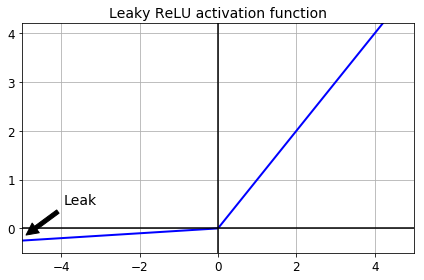

In [12]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha='center')
plt.title('Leaky ReLU activation function', fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig('leaky_relu_plot')
plt.show()

In [13]:
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')

In [14]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01 * z, z, name=name)

hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name='hidden1')

In [15]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

In [16]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=leaky_relu, name='hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=leaky_relu, name='hidden2')
    logits = tf.layers.dense(hidden2, n_outputs, name='outputs')

In [17]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [18]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [19]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [20]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data/')

Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data/train-images-idx3-ubyte.gz
Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data/train-labels-idx1-ubyte.gz
Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data/t10k-images-idx3-ubyte.gz
Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data/t10k-labels-idx1-ubyte.gz


In [23]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
            acc_test = accuracy.eval(feed_dict={X:mnist.validation.images, y:mnist.validation.labels})
            print(epoch, 'Batch accuracy:', acc_train, 'validation accuracy:', acc_test)
        
        save_path = saver.save(sess, './mnist_lrelu.ckpt')

0 Batch accuracy: 0.88 validation accuracy: 0.9044
5 Batch accuracy: 0.94 validation accuracy: 0.9498
10 Batch accuracy: 0.92 validation accuracy: 0.966
15 Batch accuracy: 1.0 validation accuracy: 0.9722
20 Batch accuracy: 1.0 validation accuracy: 0.9744
25 Batch accuracy: 0.98 validation accuracy: 0.9766
30 Batch accuracy: 1.0 validation accuracy: 0.979
35 Batch accuracy: 0.98 validation accuracy: 0.9794


In [24]:
# Elu
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

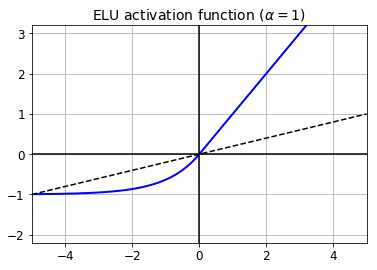

In [25]:
plt.plot(z, elu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, 1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'ELU activation function ($\alpha=1$)', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [26]:
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name='hidden1')

In [27]:
# SELU
def selu(z, scale=1.0507009873554804934193349852946,
        alpha=1.6732632423543772848170429916717):
    return scale * elu(z, alpha)

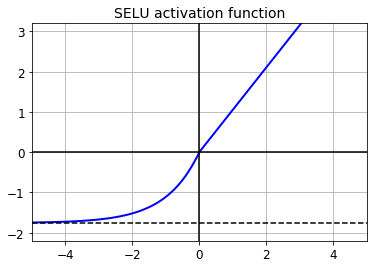

In [28]:
plt.plot(z, selu(z), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r'SELU activation function', fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

In [29]:
# with this activation function, even a 100 layer deep neural network preserves
# roughly 0 mean and 1 standard deviation across all layers, avoiding the
# exploding/vanishing gradients problem

In [31]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100))
for layer in range(100):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1/100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=1)
    stds = np.std(Z, axis=1)
    if layer % 10 == 0:
        print('Layer {}: {:.2f} < mean < {:.2f}, {:.2f} <std deviation < {:.2f}'.format(layer, means.min(), means.max(), stds.min(), stds.max()))

Layer 0: -0.26 < mean < 0.27, 0.74 <std deviation < 1.27
Layer 10: -0.24 < mean < 0.27, 0.74 <std deviation < 1.27
Layer 20: -0.17 < mean < 0.18, 0.74 <std deviation < 1.24
Layer 30: -0.27 < mean < 0.24, 0.78 <std deviation < 1.20
Layer 40: -0.38 < mean < 0.39, 0.74 <std deviation < 1.25
Layer 50: -0.27 < mean < 0.31, 0.73 <std deviation < 1.27
Layer 60: -0.26 < mean < 0.43, 0.74 <std deviation < 1.35
Layer 70: -0.19 < mean < 0.21, 0.75 <std deviation < 1.21
Layer 80: -0.18 < mean < 0.16, 0.72 <std deviation < 1.19
Layer 90: -0.19 < mean < 0.16, 0.75 <std deviation < 1.20


In [32]:
def selu(z, 
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))

In [36]:
reset_graph()

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.float32, shape=(None), name='y')

with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name='hidden1')
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name='hidden2')
    logits = tf.layers.dense(hidden2, n_outputs, name='outputs')

with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=tf.cast(y, tf.int64), logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, tf.cast(y, tf.int64), 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()
n_epochs = 40
batch_size = 50

In [38]:
means = mnist.train.images.mean(axis=0, keepdims=True)
stds = mnist.train.images.std(axis=0, keepdims=True)

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch_scaled = (X_batch - means) / stds
            sess.run(training_op, feed_dict={X: X_batch_scaled, y: y_batch})
        if epoch % 5 == 0:
            acc_train = accuracy.eval(feed_dict={X: X_batch_scaled, y: y_batch})
            X_val_scaled = (mnist.validation.images - means) / stds
            acc_test = accuracy.eval(feed_dict={X: X_val_scaled, y: mnist.validation.labels})
            print(epoch, 'Batch accuracy:', acc_train, 'Validation accuracy:', acc_test)
    
    saver_path = saver.save(sess, './mnist_selu.ckpt')

C:\Users\Aman Deep Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Aman Deep Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
C:\Users\Aman Deep Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


0 Batch accuracy: 0.0 Validation accuracy: 0.0
5 Batch accuracy: 0.0 Validation accuracy: 0.0
10 Batch accuracy: 0.0 Validation accuracy: 0.0
15 Batch accuracy: 0.0 Validation accuracy: 0.0
20 Batch accuracy: 0.0 Validation accuracy: 0.0
25 Batch accuracy: 0.0 Validation accuracy: 0.0
30 Batch accuracy: 0.0 Validation accuracy: 0.0
35 Batch accuracy: 0.0 Validation accuracy: 0.0


In [39]:
# Batch Normalization to solve Internal Covariate Shift problem

In [40]:
# Batch normalization learns four new parameters:
# gamma: scale
# beta: offset
# mu: mean
# sigma: standard deviation
# The vanishing gradients problem is strongly reduced, to the point 
# that we can use saturating activation functions such as the tanh and even
# the logistic activation function. The networks are less sensitive to the 
# weight initialization. Much larger learning rates can be used,
# significantly speeding up the learning process
# Batch Normalization also acts like a regularizer, reducing the need for 
# other regularization techniques
# Batch Normalization however adds some complexity to the model
# (although it removes the need for nomalizing the input data since the first
# hidden layer will take care of that, provided it is batch normalized)
# Moreover, there is a runtime penalty: the neural network maker slower 
# predictions due to the extra computations required at each layer.
# So if you want the predictions to be lightning fast, you may want to check
# how well plain ELU + He initialization perform before playing with batch normalization

In [42]:
# we need to run batch-norm before applying the activation, so we explicitly need to pass the outputs of any given layer through BN first and then through the elu activation function
reset_graph()

import tensorflow as tf

n_inputs = 28 * 28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
training = tf.placeholder_with_default(False, shape=(), name='training')

hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1 = tf.layers.batch_normalization(hidden1, training=training, momentum=0.9) # momentum = decay
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name='hidden2')
bn2 = tf.layers.batch_normalization(hidden2, training=training, momentum=0.9)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name='outputs')
logits = tf.layers.batch_normalization(logits_before_bn, training=training, momentum=0.9)

In [43]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
training = tf.placeholder_with_default(False, shape=(), name='training')

In [44]:
# to avoid repeating the same parameters over and over again, we can use Python's partial() function from the functools library

In [45]:
from functools import partial

batch_norm_layer = partial(tf.layers.batch_normalization, training=training, momentum=0.9)

hidden1 = tf.layers.dense(X, n_hidden1, name='hidden1')
bn1 = batch_norm_layer(hidden1)
bn1_act = tf.nn.elu(bn1)

hidden2 = tf.layers.dense(bn1_act, n_hidden2, name='hidden2')
bn2 = batch_norm_layer(hidden2)
bn2_act = tf.nn.elu(bn2)

logits_before_bn = tf.layers.dense(bn2_act, n_outputs, name='outputs')
logits = batch_norm_layer(logits_before_bn)

In [47]:
# build network with batch-normalization
reset_graph()

batch_norm_momentum = 0.9

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')
training = tf.placeholder_with_default(False, shape=(), name='training')

with tf.name_scope('dnn'):
    he_init = tf.contrib.layers.variance_scaling_initializer()
    
    batch_norm_layer = partial(tf.layers.batch_normalization,
                              training=training,
                              momentum=batch_norm_momentum)
    dense_layer = partial(tf.layers.dense,
                         kernel_initializer=he_init)
    
    hidden1 = dense_layer(X, n_hidden1, name='hidden1')
    bn1 = tf.nn.elu(batch_norm_layer(hidden1))
    hidden2 = dense_layer(bn1, n_hidden2, name='hidden2')
    bn2 = tf.nn.elu(batch_norm_layer(hidden2))
    logits_before_bn = dense_layer(bn2, n_outputs, name='outputs')
    logits = batch_norm_layer(logits_before_bn)
    
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [48]:
# since we are using tf.layers.batch_normalization() rather than tf.contrib.layers.batch_norm(), we need to explicitly run the extra update operations needed by batch normalization
n_epochs = 20
batch_size = 200
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

In [49]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run([training_op, extra_update_ops],
                     feed_dict={training: True, X: X_batch, y: y_batch})
        accuracy_val = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'Test accuracy: ', accuracy_val)
    
    save_path = saver.save(sess, './elu_and_batch_normalization_mnist.ckpt')

0 Test accuracy:  0.8652
1 Test accuracy:  0.8934
2 Test accuracy:  0.9085
3 Test accuracy:  0.9206
4 Test accuracy:  0.9253
5 Test accuracy:  0.9329
6 Test accuracy:  0.9369
7 Test accuracy:  0.9415
8 Test accuracy:  0.9444
9 Test accuracy:  0.9486
10 Test accuracy:  0.9506
11 Test accuracy:  0.9523
12 Test accuracy:  0.9536
13 Test accuracy:  0.9561
14 Test accuracy:  0.9583
15 Test accuracy:  0.9588
16 Test accuracy:  0.961
17 Test accuracy:  0.9616
18 Test accuracy:  0.9634
19 Test accuracy:  0.9629


In [50]:
# With a shallow network, batch_norm and elu are unlikely to have a positive impact,
# they shine mostly from much deeper nets
# list of trainable variables is shorter than list of non-trainable variables.
# If you want to reuse a pretrained neural network, you must not forget these non-trainable variables
[v.name for v in tf.trainable_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0']

In [51]:
[v.name for v in tf.global_variables()]

['hidden1/kernel:0',
 'hidden1/bias:0',
 'batch_normalization/gamma:0',
 'batch_normalization/beta:0',
 'batch_normalization/moving_mean:0',
 'batch_normalization/moving_variance:0',
 'hidden2/kernel:0',
 'hidden2/bias:0',
 'batch_normalization_1/gamma:0',
 'batch_normalization_1/beta:0',
 'batch_normalization_1/moving_mean:0',
 'batch_normalization_1/moving_variance:0',
 'outputs/kernel:0',
 'outputs/bias:0',
 'batch_normalization_2/gamma:0',
 'batch_normalization_2/beta:0',
 'batch_normalization_2/moving_mean:0',
 'batch_normalization_2/moving_variance:0']